In [16]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import cv2 # open-cv used for image processing  
%matplotlib inline 
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_auc_score)

In [17]:
train_dir= 'Emergency_Vehicles/train'
test_dir = 'Emergency_Vehicles/test'

In [18]:
image = cv2.imread('Emergency_Vehicles/train/1.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting to RGB 

In [19]:
train_dir #checking the directory

'Emergency_Vehicles/train'

In [20]:
type(image)

numpy.ndarray

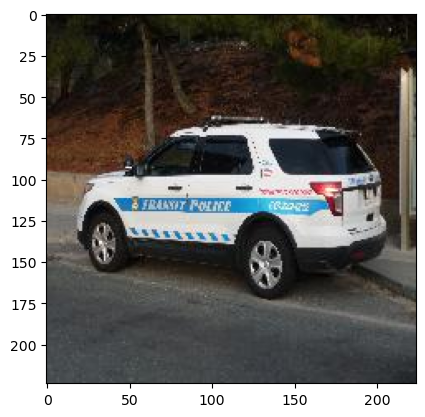

In [21]:
plt.imshow(image) 

In [22]:
image.shape # This shows the shape of the image (length, width,chanel) 

(224, 224, 3)

In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
# Here we are applying our desired transformations  
image_gen = ImageDataGenerator(  
    rotation_range=20,# specifies the rotation to be 20% 
    width_shift_range=0.1, # specifies the width shift of 10% 
    height_shift_range=0.1,# specifies the height shift of 10% 
    shear_range=0.20, # crops part of the image  
    zoom_range=0.20, # #zooms the image by 20% 
    fill_mode='nearest', # fills using the nearest pixel  
    horizontal_flip=True, # Secifies the horizontal flip  
    rescale=1/255 # scales the image  
) 

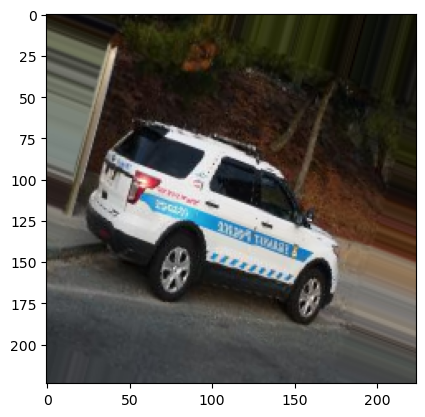

In [25]:
plt.imshow(image_gen.random_transform(image)) 

In [26]:
train_df=pd.read_csv('Emergency_Vehicles/train.csv')
test_df=pd.read_csv('Emergency_Vehicles/test.csv')

In [27]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [29]:
train_df['emergency_or_not'] = train_df['emergency_or_not'].astype(str)
test_df['emergency_or_not'] = test_df['emergency_or_not'].astype(str)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [30]:
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for trainin
                                              directory=train_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images 
                                              y_col='emergency_or_not', # specifies the class labels 
                                              class_mode='binary', # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                              batch_size=50# defines the batch size  
                                             ) 
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for tr
                                              directory=train_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images 
                                              y_col="emergency_or_not", # specifies the class labels 
                                              class_mode='binary', # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                              batch_size=50 # defines the batch size  
                                              )      
test_generator=image_gen.flow_from_dataframe(dataframe=test_df, # specify the dataset used for training
                                                    directory=test_dir, # specify the path to the directory
                                                    x_col='image_names', # specify the names of the images
                                                    y_col='emergency_or_not', # specifies the class labels
                                                    class_mode='binary', # specifies the kind of classification
                                                    target_size=(224,224), # specifies the dimension to resize the im
                                                    batch_size=32 # defines the batch size
                                            )      

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.
Found 706 validated image filenames belonging to 2 classes.


In [31]:
test_generator.class_indices

{'0': 0, '1': 1}

# Constructor stage

In [32]:
from keras.models import Sequential 
from keras.layers import Activation,Dropout,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization 

In [33]:
model = Sequential() 
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu', padding = 'valid', strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(BatchNormalization()) 
 
model.add(Flatten()) 
 
model.add(Dense(50,activation = 'relu')) 
#model.add(Dropout(0.2)) 
model.add(Dense(1,activation = 'sigmoid')) 

2022-12-14 18:13:45.748678: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compilation stage

In [34]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [36]:
model

## Training Stage

In [37]:
history=model.fit_generator(train_generator,epochs = 10,validation_data = validation_generator) #training the model

/var/folders/_6/mjhtvqbj3xqfzrng3mdq6b7c0000gn/T/ipykernel_12795/1853272796.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs = 10,validation_data = validation_generator)


Epoch 1/10
23/23 [==============================] - 45s 2s/step - loss: 0.7983 - accuracy: 0.5887 - val_loss: 0.6573 - val_accuracy: 0.6069
Epoch 2/10
23/23 [==============================] - 51s 2s/step - loss: 0.5732 - accuracy: 0.7235 - val_loss: 0.6443 - val_accuracy: 0.6250
Epoch 3/10
23/23 [==============================] - 46s 2s/step - loss: 0.5435 - accuracy: 0.7261 - val_loss: 0.6701 - val_accuracy: 0.6210
Epoch 4/10
23/23 [==============================] - 49s 2s/step - loss: 0.4783 - accuracy: 0.7730 - val_loss: 0.6420 - val_accuracy: 0.7298
Epoch 5/10
23/23 [==============================] - 46s 2s/step - loss: 0.4723 - accuracy: 0.7774 - val_loss: 0.6421 - val_accuracy: 0.7440
Epoch 6/10
23/23 [==============================] - 41s 2s/step - loss: 0.4365 - accuracy: 0.8052 - val_loss: 0.6519 - val_accuracy: 0.7823
Epoch 7/10
23/23 [==============================] - 41s 2s/step - loss: 0.4343 - accuracy: 0.7983 - val_loss: 0.6466 - val_accuracy: 0.8044
Epoch 8/10
23/23 [==

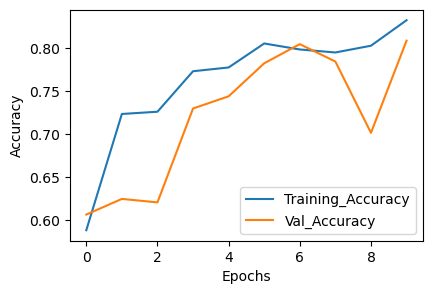

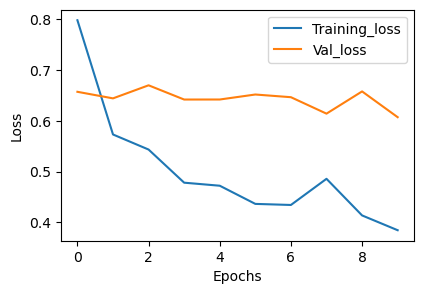

In [38]:
history_df = pd.DataFrame (history.history)
plt.figure(figsize = (10,3)) 
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], 
        label='Training_Accuracy') 
plt.plot(history_df['val_accuracy'], 
        label='Val_Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epochs') 
plt.legend() 
plt.show()

plt.figure(figsize = (10,3)) 
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], 
        label='Training_loss') 
plt.plot(history_df['val_loss'], 
        label='Val_loss') 
plt.ylabel('Loss') 
plt.xlabel('Epochs') 
plt.legend() 
plt.show() 


In [80]:
loss, acc = model.evaluate_generator(test_generator,  verbose = 0)

/var/folders/_6/mjhtvqbj3xqfzrng3mdq6b7c0000gn/T/ipykernel_11445/3713473395.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model.evaluate_generator(test_generator,  verbose = 0)


In [39]:
predictions= model.predict(x= test_generator,  verbose = 0)
predictions = [1 if pred>0.5 else 0 for pred in predictions]


In [40]:
predictions

[0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,


## Evaluation Stage

In [47]:
matrix = confusion_matrix(y_true =test_generator.classes , y_pred = predictions)
matrix

array([[294, 101],
       [232,  79]])

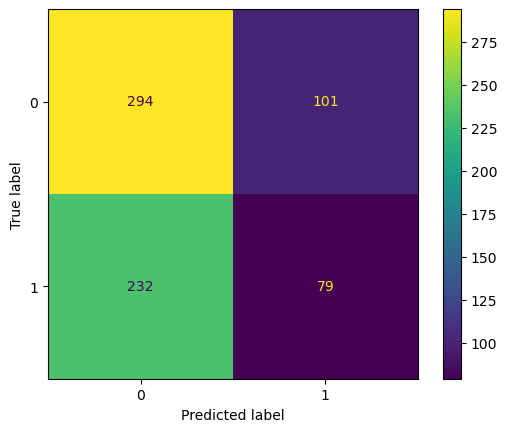

In [48]:
confuse_mat= ConfusionMatrixDisplay(matrix)
confuse_mat.plot()

In [49]:
print(classification_report(y_true = test_generator.classes, y_pred = predictions, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       395
           1       0.44      0.25      0.32       311

    accuracy                           0.53       706
   macro avg       0.50      0.50      0.48       706
weighted avg       0.51      0.53      0.50       706



## Adding other layers (Total of 5)

In [51]:
model_two = Sequential() 
model_two.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same')) 
model_two.add(MaxPooling2D(pool_size=(2,2))) 
model_two.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu', padding = 'valid', strides = 1))
model_two.add(MaxPooling2D(pool_size=(2,2)))  
model_two.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu')) 
model_two.add(MaxPooling2D(pool_size=(2,2))) 
model_two.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu')) 
model_two.add(MaxPooling2D(pool_size=(2,2)))
model_two.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu')) 
model_two.add(MaxPooling2D(pool_size=(2,2)))
model_two.add(BatchNormalization()) 
 
model_two.add(Flatten()) 
 
model_two.add(Dense(50,activation = 'relu')) 
model_two.add(Dropout(0.2)) 
model_two.add(Dense(1,activation = 'sigmoid')) 

In [52]:
model_two.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [53]:
model_two.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 110, 110, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 53, 53, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 32)      

In [54]:
history=model_two.fit_generator(train_generator,epochs = 10,validation_data = validation_generator) 

/var/folders/_6/mjhtvqbj3xqfzrng3mdq6b7c0000gn/T/ipykernel_12795/3352210702.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model_two.fit_generator(train_generator,epochs = 10,validation_data = validation_generator)


Epoch 1/10
23/23 [==============================] - 51s 2s/step - loss: 0.6866 - accuracy: 0.6000 - val_loss: 0.6730 - val_accuracy: 0.6250
Epoch 2/10
23/23 [==============================] - 42s 2s/step - loss: 0.5633 - accuracy: 0.7078 - val_loss: 0.6737 - val_accuracy: 0.6331
Epoch 3/10
23/23 [==============================] - 42s 2s/step - loss: 0.5185 - accuracy: 0.7313 - val_loss: 0.6338 - val_accuracy: 0.6673
Epoch 4/10
23/23 [==============================] - 42s 2s/step - loss: 0.5133 - accuracy: 0.7478 - val_loss: 0.6317 - val_accuracy: 0.6835
Epoch 5/10
23/23 [==============================] - 44s 2s/step - loss: 0.4703 - accuracy: 0.7757 - val_loss: 0.6360 - val_accuracy: 0.7883
Epoch 6/10
23/23 [==============================] - 53s 2s/step - loss: 0.4365 - accuracy: 0.7843 - val_loss: 0.5857 - val_accuracy: 0.7560
Epoch 7/10
23/23 [==============================] - 45s 2s/step - loss: 0.4273 - accuracy: 0.8043 - val_loss: 0.6023 - val_accuracy: 0.7944
Epoch 8/10
23/23 [==

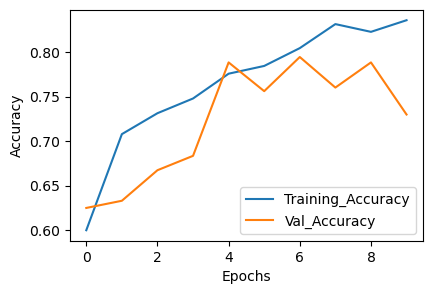

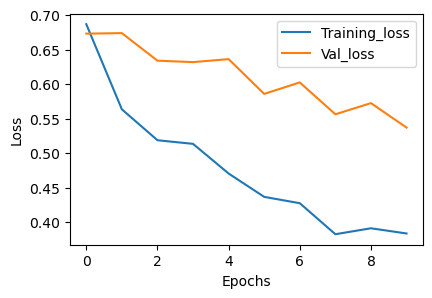

In [55]:
history_df = pd.DataFrame (history.history)
plt.figure(figsize = (10,3)) 
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], 
        label='Training_Accuracy') 
plt.plot(history_df['val_accuracy'], 
        label='Val_Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epochs') 
plt.legend() 
plt.show()

plt.figure(figsize = (10,3)) 
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], 
        label='Training_loss') 
plt.plot(history_df['val_loss'], 
        label='Val_loss') 
plt.ylabel('Loss') 
plt.xlabel('Epochs') 
plt.legend() 
plt.show() 


In [56]:
predictions= model.predict(x= test_generator,  verbose = 0)
predictions = [1 if pred>0.5 else 0 for pred in predictions]


In [57]:
mat = confusion_matrix(y_true =test_generator.classes , y_pred = predictions)
mat

array([[302,  93],
       [231,  80]])

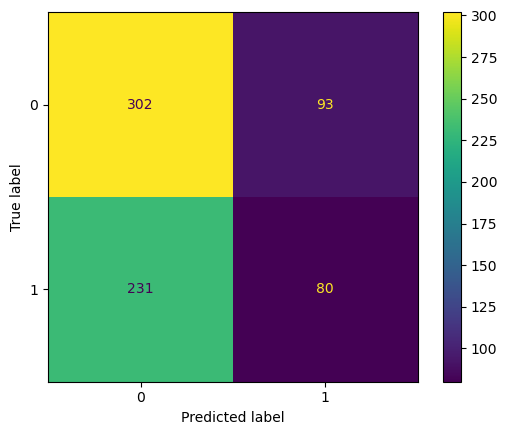

In [58]:
confuse_mat= ConfusionMatrixDisplay(mat)
confuse_mat.plot()

In [59]:
print(classification_report(y_true = test_generator.classes, y_pred = predictions, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65       395
           1       0.46      0.26      0.33       311

    accuracy                           0.54       706
   macro avg       0.51      0.51      0.49       706
weighted avg       0.52      0.54      0.51       706

